# Readme



structured_data contains numeric values from labs and vitals; patient demographic; target variable "hospital_expire_flag" (death in the hospital stay). There are 232 rows in total.
Variables include:
**gender**
**age_at_admission**
**hadm_id** (id for each hospital encounter)
**in_hospital_time(days)**
**ethnicity**
**diagnosis**
**hospital_expire_flag**
**vitals**
**lab results**





Unstructured_data contains: **hadm_id**, **hospital_expire_flag**, **description**, **text**, **processed_text**

processed_text contains the lowercase text that removed the non-alphanumeric characters and stop words, tokenized, and lemmatized.

# Data Preprossing (skip if you have both un/structured_data.csv)

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from datetime import datetime
import pandas as pd
import numpy as np

Mounted at /content/drive


,subject_id,gender,dob,dod,dod_hosp,dod_ssn,hadm_id,admittime,dischtime,deathtime,...,icd9_code,seq_num,chartdate,charttime,storetime,category,description,cgid,iserror,text
0,1399,M,2034-04-19,2109-03-23,2109-03-23,2109-03-23,108903,2109-03-07 15:43:00,2109-03-23 12:02:00,2109-03-23 12:02:00,...,585,3,2108-06-01,NaN,NaN,ECG,Report,NaN,NaN,Sinus rhythm. Prolonged P-R interval. Low volt...
1,5604,M,2099-08-06,2161-03-22,2161-03-22,2161-03-22,161464,2161-03-01 19:24:00,2161-03-17 16:15:00,NaN,...,585,4,2161-02-18,NaN,NaN,ECG,Report,NaN,NaN,Atrio-ventricular conduction delay. The P-R in...
2,5604,M,2099-08-06,2161-03-22,2161-03-22,2161-03-22,132833,2161-01-29 19:52:00,2161-02-27 16:36:00,NaN,...,585,6,2161-02-18,NaN,NaN,ECG,Report,NaN,NaN,Atrio-ventricular conduction delay. The P-R in...
3,26384,F,1885-10-27,2189-11-11,NaN,2189-11-11,133926,2186-12-31 13:12:00,2187-01-09 11:15:00,NaN,...,585,4,2186-11-17,NaN,NaN,ECG,Report,NaN,NaN,Probable sinus tachycardia. Since the previous...
4,17928,M,2060-02-11,2126-03-07,NaN,2126-03-07,182341,2124-06-30 00:10:00,2124-07-12 16:30:00,NaN,...,585,3,2124-10-09,NaN,NaN,ECG,Report,NaN,NaN,Sinus rhythm\nBorderline first degree AV block...


In [ ]:
file_path = '/content/drive/My Drive/data_padn.csv'
df = pd.read_csv(file_path)

df.head()

,subject_id,gender,dob,dod,dod_hosp,dod_ssn,hadm_id,admittime,dischtime,deathtime,...,icd9_code,seq_num,chartdate,charttime,storetime,category,description,cgid,iserror,text
0,1399,M,2034-04-19,2109-03-23,2109-03-23,2109-03-23,108903,2109-03-07 15:43:00,2109-03-23 12:02:00,2109-03-23 12:02:00,...,585,3,2108-06-01,NaN,NaN,ECG,Report,NaN,NaN,Sinus rhythm. Prolonged P-R interval. Low volt...
1,5604,M,2099-08-06,2161-03-22,2161-03-22,2161-03-22,161464,2161-03-01 19:24:00,2161-03-17 16:15:00,NaN,...,585,4,2161-02-18,NaN,NaN,ECG,Report,NaN,NaN,Atrio-ventricular conduction delay. The P-R in...
2,5604,M,2099-08-06,2161-03-22,2161-03-22,2161-03-22,132833,2161-01-29 19:52:00,2161-02-27 16:36:00,NaN,...,585,6,2161-02-18,NaN,NaN,ECG,Report,NaN,NaN,Atrio-ventricular conduction delay. The P-R in...
3,26384,F,1885-10-27,2189-11-11,NaN,2189-11-11,133926,2186-12-31 13:12:00,2187-01-09 11:15:00,NaN,...,585,4,2186-11-17,NaN,NaN,ECG,Report,NaN,NaN,Probable sinus tachycardia. Since the previous...
4,17928,M,2060-02-11,2126-03-07,NaN,2126-03-07,182341,2124-06-30 00:10:00,2124-07-12 16:30:00,NaN,...,585,3,2124-10-09,NaN,NaN,ECG,Report,NaN,NaN,Sinus rhythm\nBorderline first degree AV block...


In [ ]:
df['dob'] = pd.to_datetime(df['dob'], errors='coerce')
df['admittime'] = pd.to_datetime(df['admittime'], errors='coerce')
df['dischtime'] = pd.to_datetime(df['dischtime'], errors='coerce')

df = df[(df['dob'].dt.year > 1900) & (df['admittime'].dt.year < 2200)].copy()

df['age_at_admission'] = (df['admittime'] - df['dob']).dt.days // 365
df['in_hospital_time(days)'] = (df['dischtime'] - df['admittime']).dt.total_seconds() / (24 * 3600)
df['in_hospital_time(days)'] = df['in_hospital_time(days)'].round().astype(int)

df = df[(df['age_at_admission'] >= 0) & (df['age_at_admission'] <= 150)].copy()

df.loc[df['age_at_admission'] > 89, 'age_at_admission'] = 90

In [ ]:
# Select relevant columns
relevant_columns = ['subject_id', 'gender', 'age_at_admission','hadm_id', 'in_hospital_time(days)', 'ethnicity', 'diagnosis', 'hospital_expire_flag']
structured_df = df[relevant_columns]
structured_df

,subject_id,gender,age_at_admission,hadm_id,in_hospital_time(days),ethnicity,diagnosis,hospital_expire_flag
0,1399,M,74,108903,16,WHITE,"NUTRITIONAL DEFICIT,WEIGHT LOSS",1
1,5604,M,61,161464,16,WHITE,ACUTE CORONARY SYNDROME,0
2,5604,M,61,132833,29,WHITE,GANGRENE FOOT;CELLULITIS,0
4,17928,M,64,182341,13,WHITE,NECROTIC LEFT GREAT TOE,0
5,23179,M,78,184235,12,WHITE,CONGESTIVE HEART FAILURE,0
...,...,...,...,...,...,...,...,...
26984,19620,F,43,140789,31,WHITE,FEVER,0
26985,19620,F,43,140789,31,WHITE,FEVER,0
26986,19620,F,43,140789,31,WHITE,FEVER,0
26987,19620,F,43,140789,31,WHITE,FEVER,0


In [ ]:
structured_df = structured_df.drop_duplicates()

In [ ]:
relevant_column = ['hadm_id', 'hospital_expire_flag', 'description', 'text']

unstructured_df = df[relevant_column]
unstructured_df

,hadm_id,hospital_expire_flag,description,text
0,108903,1,Report,Sinus rhythm. Prolonged P-R interval. Low volt...
1,161464,0,Report,Atrio-ventricular conduction delay. The P-R in...
2,132833,0,Report,Atrio-ventricular conduction delay. The P-R in...
4,182341,0,Report,Sinus rhythm\nBorderline first degree AV block...
5,184235,0,Report,A-V sequential pacemaker. Compared to the prev...
...,...,...,...,...
26984,140789,0,Report,[**Wardname **] 4 ICU NURSING ADMISSION NOTE\n...
26985,140789,0,ESOPHAGUS,[**2165-2-11**] 10:19 AM\n ESOPHAGUS ...
26986,140789,0,CHEST (PORTABLE AP),[**2165-5-29**] 11:10 AM\n CHEST (PORTABLE AP)...
26987,140789,0,CHEST (PORTABLE AP),[**2163-5-3**] 10:41 AM\n CHEST (PORTABLE AP) ...


In [ ]:
unstructured_df.to_csv('unstructured_data.csv', index=False)

In [ ]:
file_path = '/content/drive/My Drive/data_lab.csv'
lab = pd.read_csv(file_path)
lab.columns = lab.columns.str.lower()
lab

,row_id,subject_id,hadm_id,itemid,charttime,value,valuenum,valueuom,flag,label,fluid,category,loinc_code
0,11858600,19128,157773,51200,2114-05-17 20:58:00,0,0.0,%,NaN,Eosinophils,Blood,Hematology,711-2
1,921895,1399,108903,51200,2109-03-07 16:00:00,0,0.0,%,NaN,Eosinophils,Blood,Hematology,711-2
2,11232437,18126,109288,51200,2140-05-06 07:15:00,0,0.0,%,NaN,Eosinophils,Blood,Hematology,711-2
3,10125790,16362,128677,51200,2101-10-06 02:38:00,0,0.0,%,NaN,Eosinophils,Blood,Hematology,711-2
4,16050700,25943,118412,51200,2154-12-17 20:40:00,0,0.0,%,NaN,Eosinophils,Blood,Hematology,711-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152916,220859,353,159730,50940,2148-06-22 12:30:00,POSITIVE,NaN,NaN,NaN,Hepatitis B Surface Antibody,Blood,Chemistry,5193-8
152917,11590675,18739,141681,51196,2136-09-03 06:55:00,1157,1157.0,ng/mL,abnormal,D-Dimer,Blood,Hematology,48065-7
152918,2991315,4798,190043,51196,2195-12-30 14:10:00,>2000,NaN,ng/mL,NaN,D-Dimer,Blood,Hematology,48065-7
152919,16166810,26136,101384,51197,2144-05-05 10:41:00,OCCASIONAL,NaN,NaN,NaN,Elliptocytes,Blood,Hematology,6681-1


In [ ]:
columns_e = ['subject_id', 'hadm_id', 'value', 'valuenum', 'valueuom', 'flag', 'label', 'fluid', 'category', 'loinc_code']
lab_df = lab[columns_e]

In [ ]:
lab_df['label_uom'] = lab_df['label'] + ' (' + lab_df['valueuom'] + ')'

<ipython-input-10-c29e1b84a36b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab_df['label_uom'] = lab_df['label'] + ' (' + lab_df['valueuom'] + ')'


In [ ]:

lab_pivot_df = lab_df.pivot_table(index=['hadm_id'],
                                    columns='label_uom',
                                    values='valuenum',
                                    aggfunc='first').reset_index()

# Reset index to turn the MultiIndex into columns again
lab_pivot_df.reset_index(inplace=True)


In [ ]:
lab_with_patient_info = pd.merge(lab_pivot_df, structured_df, on=['hadm_id'], how='inner')

In [ ]:
file_path = '/content/drive/My Drive/data_chart.csv'
chart = pd.read_csv(file_path)

chart.columns = chart.columns.str.lower()

chart

,row_id,subject_id,hadm_id,icustay_id,itemid,charttime,storetime,cgid,value,valuenum,valueuom,warning,error,resultstatus,stopped,label,abbreviation,dbsource,icd9_code
0,55566341,4104,199806,241443.0,578,2156-08-29 16:00:00,2156-08-29 16:00:00,21570,NaN,NaN,NaN,NaN,NaN,NaN,D/C'd,Pressure Support,NaN,carevue,585
1,104832113,13796,180475,245848.0,646,2157-10-11 08:00:00,2157-10-11 09:35:00,17693,NaN,NaN,%,NaN,NaN,NaN,NotStopd,SpO2,NaN,carevue,585
2,132113590,19128,157773,208389.0,924,2114-05-17 22:23:00,2114-05-17 22:23:00,21570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Readmission,NaN,carevue,585
3,135456430,19872,134153,249265.0,927,2106-08-24 06:38:00,2106-08-24 06:38:00,21570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Allergy 2,NaN,carevue,585
4,65241221,6000,138171,219597.0,935,2119-08-10 00:21:00,2119-08-10 00:21:00,21570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Allergy 3,NaN,carevue,585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520454,47645915,2553,126138,209401.0,478,2122-12-08 17:00:00,2122-12-08 16:52:00,16818,Teeth/Tissue WNL,NaN,NaN,NaN,NaN,NaN,NotStopd,Oral Cavity,NaN,carevue,585
1520455,47617869,2553,126138,209401.0,70,2122-11-20 08:00:00,2122-11-20 07:43:00,17590,1.2503199577331543,1.250320,m2,NaN,NaN,NaN,NotStopd,BSA - English,NaN,carevue,585
1520456,47631166,2553,126138,209401.0,1522,2122-11-29 05:15:00,2122-11-29 06:02:00,15331,11.199999809265137,11.200000,mg/dl,NaN,NaN,Final,NotStopd,Calcium,NaN,carevue,585
1520457,47615429,2553,126138,209401.0,833,2122-11-18 03:55:00,2122-11-18 04:21:00,15331,3.1800000667572021,3.180000,/mic l,NaN,NaN,Final,NotStopd,RBC,NaN,carevue,585


In [ ]:
columns = ['subject_id', 'hadm_id', 'value', 'valuenum', 'valueuom', 'warning', 'resultstatus', 'label', 'abbreviation']
chart_df = chart[columns]

chart_df['label_uom'] = chart_df['label'] + ' (' + chart_df['valueuom'] + ')'

<ipython-input-16-71d70a5f72fc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chart_df['label_uom'] = chart_df['label'] + ' (' + chart_df['valueuom'] + ')'


In [ ]:
chart_pivot_df = chart_df.pivot_table(index=['hadm_id'],
                                    columns='label_uom',
                                    values='valuenum',
                                    aggfunc='first').reset_index()

In [ ]:
structure_data = pd.merge(chart_pivot_df, lab_with_patient_info, on=['hadm_id'], how='inner')

In [ ]:
structure_data.columns = structure_data.columns.str.replace('[', '', regex=False)\
                        .str.replace(']', '', regex=False)\
                        .str.replace('(', '', regex=False)\
                        .str.replace(')', '', regex=False)\
                        .str.replace('.', '', regex=False)\
                        .str.replace('<', '', regex=False)\
                        .str.replace(' ', '_')

In [ ]:
structure_data.to_csv('structured_data.csv', index=False)

# Structured Data



## Feature Extraction

I use XGBoost for feature extraction here.

In [ ]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 1.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, roc_curve
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve
from sklearn.metrics import accuracy_score

In [ ]:

structure_data = pd.read_csv('/content/drive/My Drive/BIS550_DATA/transformer models/structured_data.csv')

In [ ]:
# Convert the categorical variables to numeric
category = structure_data.select_dtypes(include=['object'])
structure_data[category.columns] = structure_data[category.columns].astype(str)
structure_data[category.columns] = structure_data[category.columns].apply(LabelEncoder().fit_transform)

In [ ]:
X = structure_data.drop('hospital_expire_flag', axis=1)
y = structure_data['hospital_expire_flag']
X

,subject_id,hadm_id,gender,age_at_admission,in_hospital_timedays,ethnicity,diagnosis,ABI_L_,ABI_R_,ABI_Ankle_BP_Left_mmHg,...,"WBC,_Pleural_#/uL",White_Blood_Cells_K/uL,Young_Cells_%,pCO2_MM_HG,pCO2_mm_Hg,pH_UNITS,pH_units,pO2_MM_HG,pO2_mm_Hg,tacroFK_ng/mL
0,2700,100335,1,86,10,6,60,NaN,NaN,NaN,...,NaN,8.6,NaN,NaN,31.0,NaN,7.34,NaN,91.0,NaN
1,3261,100848,1,73,12,5,176,NaN,NaN,NaN,...,NaN,6.3,NaN,NaN,46.0,NaN,7.38,NaN,38.0,NaN
2,26136,101384,0,73,7,6,103,NaN,NaN,NaN,...,NaN,10.0,NaN,NaN,45.0,NaN,7.42,NaN,41.0,NaN
3,5034,101708,1,76,6,6,43,NaN,NaN,NaN,...,NaN,7.0,NaN,NaN,54.0,NaN,7.28,NaN,55.0,NaN
4,14995,102432,1,83,12,5,2,NaN,NaN,NaN,...,NaN,8.1,NaN,37.0,NaN,7.44,5.50,29.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,26637,199511,0,68,30,1,101,NaN,NaN,NaN,...,NaN,18.0,NaN,NaN,33.0,NaN,7.48,NaN,42.0,NaN
228,14514,199646,1,86,34,6,134,NaN,NaN,NaN,...,NaN,7.6,NaN,NaN,37.0,NaN,5.00,NaN,73.0,NaN
229,4104,199806,0,44,8,6,184,NaN,NaN,NaN,...,NaN,3.2,NaN,31.0,NaN,7.38,6.50,177.0,NaN,NaN
230,18356,199964,0,59,12,1,175,NaN,NaN,NaN,...,NaN,7.3,NaN,20.0,NaN,7.41,NaN,52.0,NaN,NaN


In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb_clf.fit(X_train, y_train)

# Get feature importances
feature_importances = xgb_clf.feature_importances_

# Convert feature importances into a Series for easy plotting
importances_series = pd.Series(feature_importances, index=X.columns)

# Sort the features by importance and select the top 35
top_100_importances = importances_series.sort_values(ascending=False)[:100]

In [ ]:
features = pd.DataFrame(top_100_importances, columns=['Importance'])

features.head()

,Importance
Resp_Rate_Total_BPM,0.144052
Alanine_Aminotransferase_ALT_IU/L,0.090843
Minute_VolumeObser_L/min,0.067829
Temperature_F_Deg_F,0.050998
"Creatine_Kinase,_MB_Isoenzyme_ng/mL",0.044140


In [ ]:
features.to_csv('xgboost_features_100.csv', index=True)

## XGBoost Model Development & Evaluation

In [ ]:
# First, split the dataset into a training set and a temporary set (combining validation and test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% training, 20% temp

# Now, split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

xgb_clf = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb_clf.fit(X_train, y_train)

# Predict probabilities
y_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]\

# Predict class labels for the test set
y_pred = xgb_clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for XGBoost on Test Data:", accuracy)

# Calculate AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC for Xgboost on Test Data:", roc_auc)

# Calculate PR-AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
print("PR-AUC for Xgboost on Test Data:", pr_auc)

# Predict probabilities for Validation data
y_pred_proba_xgb_val = xgb_clf.predict_proba(X_val)[:, 1]

# Predict class labels for the test set
y_pred_val = xgb_clf.predict(X_val)

# Calculate the accuracy
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Accuracy for XGBoost on Validation Data:", accuracy_val)

# ROC-AUC for XGBoost on Validation data
roc_auc_xgb_val = roc_auc_score(y_val, y_pred_proba_xgb_val)
print("ROC-AUC for XGBoost on Validation Data:", roc_auc_xgb_val)

# PR-AUC for XGBoost on Validation data
precision_xgb_val, recall_xgb_val, _ = precision_recall_curve(y_val, y_pred_proba_xgb_val)
pr_auc_xgb_val = auc(recall_xgb_val, precision_xgb_val)
print("PR-AUC for XGBoost on Validation Data:", pr_auc_xgb_val)

Accuracy for XGBoost on Test Data: 0.9166666666666666
ROC-AUC for Xgboost on Test Data: 0.9625
PR-AUC for Xgboost on Test Data: 0.8354166666666666
Accuracy for XGBoost on Validation Data: 0.8260869565217391
ROC-AUC for XGBoost on Validation Data: 0.8787878787878787
PR-AUC for XGBoost on Validation Data: 0.9153226933365275


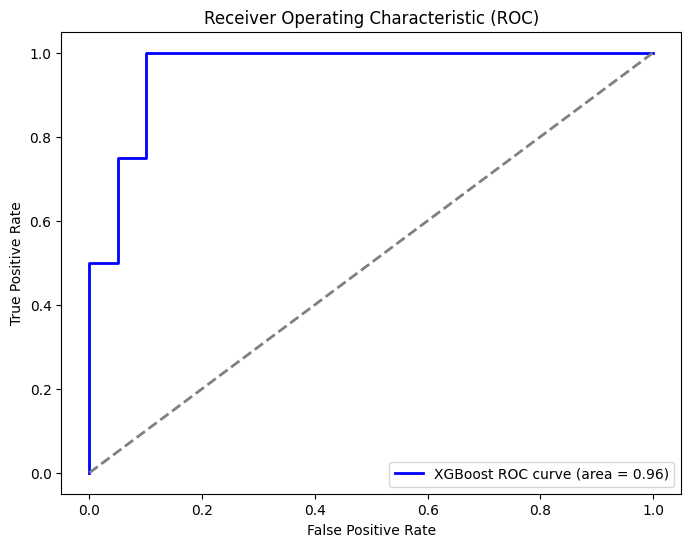

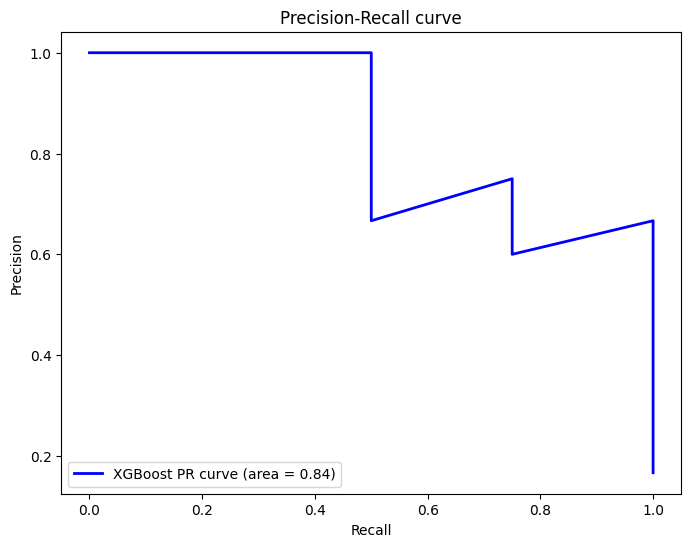

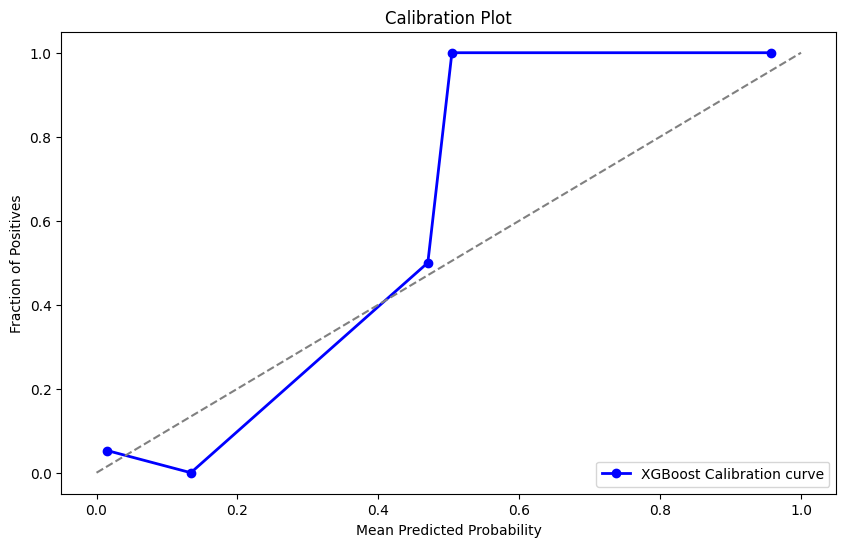

In [ ]:
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='blue', lw=2, label='XGBoost ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='XGBoost PR curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")
plt.show()

prob_true, prob_pred = calibration_curve(y_test, y_pred_proba, n_bins=10)
plt.figure(figsize=(10, 6))
plt.plot(prob_pred, prob_true, color = 'blue', marker='o', lw=2, label='XGBoost Calibration curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Plot')
plt.legend(loc="lower right")
plt.show()

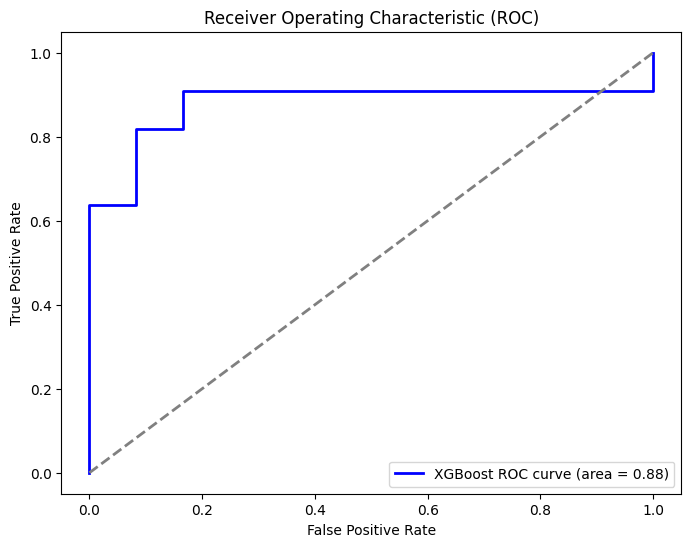

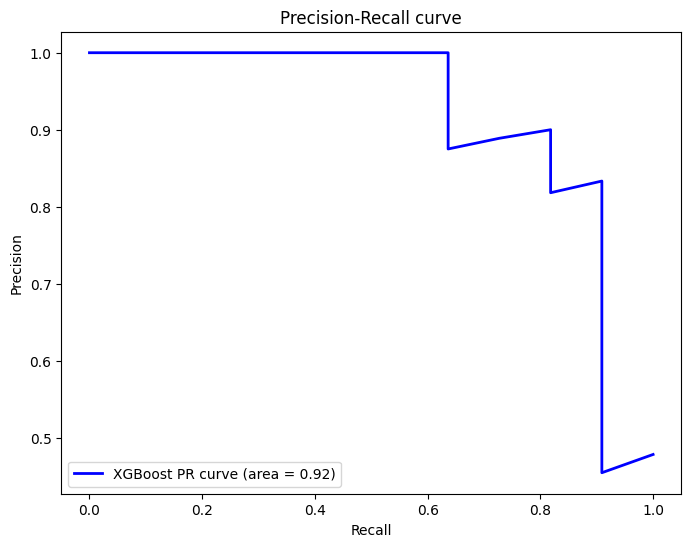

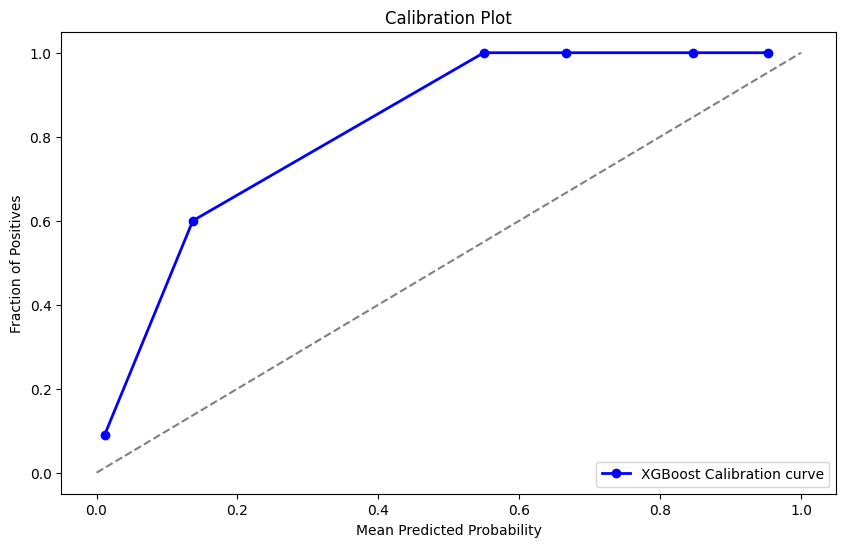

In [ ]:
# For validation
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_val, y_pred_proba_xgb_val)
plt.plot(fpr, tpr, color='blue', lw=2, label='XGBoost ROC curve (area = %0.2f)' % roc_auc_xgb_val)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(recall_xgb_val, precision_xgb_val, color='blue', lw=2, label='XGBoost PR curve (area = %0.2f)' % pr_auc_xgb_val)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")
plt.show()

prob_true, prob_pred = calibration_curve(y_val, y_pred_proba_xgb_val, n_bins=10)
plt.figure(figsize=(10, 6))
plt.plot(prob_pred, prob_true, color = 'blue', marker='o', lw=2, label='XGBoost Calibration curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Plot')
plt.legend(loc="lower right")
plt.show()

# Unstructured data

**BERT Embedding** and **TF-IDF Vectorizer** were used here to extract features. You can use whatever you think works best.

A fine-tuning BERT model was developed for reference.

## Tokenization (skip if you have "unstructured_data.csv")

In [ ]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    # Removing punctuation and non-alphanumeric characters but allowing spaces
    text = re.sub(r'[^\w\s]', ' ', text)
    # Tokenization
    tokens = word_tokenize(text)
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Removing purely numeric tokens
    tokens = [token for token in tokens if token.isalnum() and not token.isdigit()]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into a string
    processed_text = ' '.join(tokens)

    # Check if the processed text is empty or consists only of numbers (this should be always false due to previous filtering)
    if processed_text.strip().isdigit() or not processed_text.strip():
        return 'novaluetoken'  # Placeholder for rows with non-informative content
    return processed_text


unstructured_df['processed_text'] = unstructured_df['text'].apply(preprocess_text)


<ipython-input-37-25971b69c67b>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unstructured_df['processed_text'] = unstructured_df['text'].apply(preprocess_text)


In [ ]:
unstructured_df.to_csv('unstructured_data.csv', index=False)

## BERT Embedding

In [ ]:
import pandas as pd
import numpy as np
from transformers import BertModel, BertTokenizer
import torch
from tqdm import tqdm

In [ ]:
unstructured_df = pd.read_csv("unstructured_data.csv")

In [ ]:
# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Load pre-trained model (weights)
model = BertModel.from_pretrained('bert-base-uncased')

model.eval()  # Put the model in evaluation mode

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

In [ ]:
# Function to encode text and obtain embeddings
def get_bert_embeddings(text, tokenizer, model):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    outputs = model(**inputs)
    # Use the embedding of the [CLS] token (first token) as the sentence representation
    cls_embedding = outputs.last_hidden_state[:, 0, :].detach().numpy()
    return cls_embedding

sample_text = unstructured_df['processed_text'][0]
cls_embedding = get_bert_embeddings(sample_text, tokenizer, model)

print(cls_embedding.shape)  # Should be (1, 768) for BERT-base


(1, 768)


In [ ]:
def get_bert_embeddings_batch(texts, tokenizer, model, batch_size=128):
    # Container for all embeddings
    all_embeddings = []

    # Process texts in batches
    for i in tqdm(range(0, len(texts), batch_size)):
        # Select the batch
        batch_texts = texts[i:i+batch_size]

        # Encode the batch
        inputs = tokenizer(batch_texts, return_tensors="pt", padding=True, truncation=True, max_length=512)

        # Move the batch to the same device as the model
        inputs = {k: v.to(model.device) for k, v in inputs.items()}

        # Get model output
        with torch.no_grad():
            outputs = model(**inputs)

        # Extract embeddings for the [CLS] token (here we get sentence-level embeddings)
        cls_embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()

        # Append embeddings of the batch
        all_embeddings.append(cls_embeddings)

    # Concatenate all batch embeddings
    all_embeddings = np.vstack(all_embeddings)

    return all_embeddings


model = model.to('cuda' if torch.cuda.is_available() else 'cpu')

embeddings = get_bert_embeddings_batch(unstructured_df['processed_text'].tolist(), tokenizer, model, batch_size=128)

100%|██████████| 201/201 [16:43<00:00,  4.99s/it]


In [ ]:
print("Shape of embeddings:", embeddings.shape)

Shape of embeddings: (25700, 768)


In [ ]:
# training takes time, read the file to use on further machine learning
np.save('bert_embeddings.npy', embeddings)  # Saves the array to bert_embeddings.npy
# read the file:
# embeddings = np.load('bert_embeddings.npy')

## TF-IDF Vectorizer

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

In [ ]:
unstructured_df = pd.read_csv("unstructured_data.csv")

In [ ]:
# Initialize a TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the processed text
tfidf_features = tfidf_vectorizer.fit_transform(unstructured_df['processed_text'])

# TF-IDF features are in a sparse matrix form.
tfidf_features_dense = tfidf_features.todense()

print("Shape of TF-IDF Features:", tfidf_features_dense.shape)

Shape of TF-IDF Features: (25700, 5000)


## Fine-tuning BERT

In [ ]:
import pandas as pd
import numpy as np
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
import torch
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler, TensorDataset, random_split
from tqdm import tqdm
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [ ]:
unstructured_df = pd.read_csv("/content/drive/My Drive/BIS550_DATA/transformer/unstructured_data.csv")

In [ ]:
texts = unstructured_df['processed_text'].tolist()
labels = unstructured_df['hospital_expire_flag'].tolist()

In [ ]:
model_name = 'emilyalsentzer/Bio_ClinicalBERT'  # Consider 'emilyalsentzer/Bio_ClinicalBERT' for clinical texts

tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at emilyalsentzer/Bio_ClinicalBERT and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
input_ids = []
attention_masks = []

for text in texts:
    encoded_dict = tokenizer.encode_plus(
                        text,
                        add_special_tokens=True,
                        max_length=64,
                        padding='max_length',
                        truncation=True,
                        return_attention_mask=True,
                        return_tensors='pt',
                   )

    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])

input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)


In [ ]:
# Use 90% for training and 10% for validation.
train_size = int(0.9 * len(input_ids))
val_size = len(input_ids) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(TensorDataset(input_ids, attention_masks, labels), [train_size, val_size])

batch_size = 32

train_dataloader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=batch_size)
validation_dataloader = DataLoader(val_dataset, sampler=SequentialSampler(val_dataset), batch_size=batch_size)


In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

# Move the model to the GPU
model.to(device)

# Set up the optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5, eps=1e-8)

# Number of training epochs
epochs = 5

# Total number of training steps
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [ ]:
# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

# Set the seed value all over the place to make this reproducible.
seed_val = 42
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Store the average loss after each epoch so we can plot them.
loss_values = []

for epoch_i in range(0, epochs):
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    total_loss = 0
    model.train()

    for step, batch in tqdm(enumerate(train_dataloader), desc="Iteration"):

        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)

        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch

        # Clear any previously calculated gradients before performing a backward pass
        model.zero_grad()

        # Perform a forward pass (evaluate the model on this training batch)
        outputs = model(b_input_ids,
                        token_type_ids=None,
                        attention_mask=b_input_mask,
                        labels=b_labels)
        loss = outputs[0]

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value
        # from the tensor.
        total_loss += loss.item()

        # Perform a backward pass to calculate the gradients
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient
        optimizer.step()

        # Update the learning rate
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)

    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("")
    print("Running Validation...")

    model.eval()

    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    for batch in validation_dataloader:

        batch = tuple(t.to(device) for t in batch)

        b_input_ids, b_input_mask, b_labels = batch

        with torch.no_grad():
            outputs = model(b_input_ids,
                            token_type_ids=None,
                            attention_mask=b_input_mask)

        logits = outputs[0]

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        tmp_eval_accuracy = flat_accuracy(logits, label_ids)

        eval_accuracy += tmp_eval_accuracy

        nb_eval_steps += 1

    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))

print("")
print("Training complete!")



======== Epoch 1 / 75 ========
Training...


Iteration: 723it [04:02,  2.98it/s]



  Average training loss: 0.43

Running Validation...
  Accuracy: 0.82

======== Epoch 2 / 75 ========
Training...


Iteration: 723it [04:06,  2.94it/s]



  Average training loss: 0.37

Running Validation...
  Accuracy: 0.82

======== Epoch 3 / 75 ========
Training...


Iteration: 723it [04:06,  2.93it/s]



  Average training loss: 0.30

Running Validation...
  Accuracy: 0.83

======== Epoch 4 / 75 ========
Training...


Iteration: 723it [04:06,  2.93it/s]



  Average training loss: 0.24

Running Validation...
  Accuracy: 0.82

======== Epoch 5 / 75 ========
Training...


Iteration: 723it [04:06,  2.93it/s]



  Average training loss: 0.20

Running Validation...
  Accuracy: 0.82

======== Epoch 6 / 75 ========
Training...


Iteration: 723it [04:06,  2.93it/s]



  Average training loss: 0.17

Running Validation...
  Accuracy: 0.82

======== Epoch 7 / 75 ========
Training...


Iteration: 723it [04:06,  2.93it/s]



  Average training loss: 0.15

Running Validation...
  Accuracy: 0.81

======== Epoch 8 / 75 ========
Training...


Iteration: 723it [04:06,  2.93it/s]



  Average training loss: 0.13

Running Validation...
  Accuracy: 0.81

======== Epoch 9 / 75 ========
Training...


Iteration: 723it [04:06,  2.93it/s]



  Average training loss: 0.12

Running Validation...
  Accuracy: 0.82

======== Epoch 10 / 75 ========
Training...


Iteration: 723it [04:06,  2.93it/s]



  Average training loss: 0.11

Running Validation...
  Accuracy: 0.81

======== Epoch 11 / 75 ========
Training...


Iteration: 723it [04:06,  2.93it/s]



  Average training loss: 0.11

Running Validation...
  Accuracy: 0.80

======== Epoch 12 / 75 ========
Training...


Iteration: 723it [04:06,  2.94it/s]



  Average training loss: 0.10

Running Validation...
  Accuracy: 0.82

======== Epoch 13 / 75 ========
Training...


Iteration: 723it [04:06,  2.94it/s]



  Average training loss: 0.10

Running Validation...
  Accuracy: 0.81

======== Epoch 14 / 75 ========
Training...


Iteration: 723it [04:06,  2.94it/s]



  Average training loss: 0.10

Running Validation...
  Accuracy: 0.81

======== Epoch 15 / 75 ========
Training...


Iteration: 723it [04:06,  2.93it/s]



  Average training loss: 0.09

Running Validation...
  Accuracy: 0.81

======== Epoch 16 / 75 ========
Training...


Iteration: 723it [04:06,  2.93it/s]



  Average training loss: 0.09

Running Validation...
  Accuracy: 0.81

======== Epoch 17 / 75 ========
Training...


Iteration: 723it [04:06,  2.93it/s]



  Average training loss: 0.09

Running Validation...
  Accuracy: 0.80

======== Epoch 18 / 75 ========
Training...


Iteration: 723it [04:06,  2.94it/s]



  Average training loss: 0.09

Running Validation...
  Accuracy: 0.80

======== Epoch 19 / 75 ========
Training...


Iteration: 723it [04:06,  2.93it/s]



  Average training loss: 0.09

Running Validation...
  Accuracy: 0.80

======== Epoch 20 / 75 ========
Training...


Iteration: 723it [04:06,  2.93it/s]



  Average training loss: 0.08

Running Validation...
  Accuracy: 0.81

======== Epoch 21 / 75 ========
Training...


Iteration: 723it [04:06,  2.93it/s]



  Average training loss: 0.08

Running Validation...
  Accuracy: 0.81

======== Epoch 22 / 75 ========
Training...


Iteration: 723it [04:06,  2.93it/s]



  Average training loss: 0.08

Running Validation...
  Accuracy: 0.81

======== Epoch 23 / 75 ========
Training...


Iteration: 723it [04:06,  2.93it/s]



  Average training loss: 0.08

Running Validation...
  Accuracy: 0.81

======== Epoch 24 / 75 ========
Training...


Iteration: 723it [04:06,  2.94it/s]



  Average training loss: 0.07

Running Validation...
  Accuracy: 0.81

======== Epoch 25 / 75 ========
Training...


Iteration: 723it [04:06,  2.94it/s]



  Average training loss: 0.07

Running Validation...
  Accuracy: 0.80

======== Epoch 26 / 75 ========
Training...


Iteration: 723it [04:06,  2.93it/s]



  Average training loss: 0.07

Running Validation...
  Accuracy: 0.82

======== Epoch 27 / 75 ========
Training...


Iteration: 723it [04:06,  2.93it/s]



  Average training loss: 0.07

Running Validation...
  Accuracy: 0.81

======== Epoch 28 / 75 ========
Training...


Iteration: 723it [04:06,  2.93it/s]



  Average training loss: 0.07

Running Validation...
  Accuracy: 0.81

======== Epoch 29 / 75 ========
Training...


Iteration: 723it [04:06,  2.93it/s]



  Average training loss: 0.07

Running Validation...
  Accuracy: 0.82

======== Epoch 30 / 75 ========
Training...


Iteration: 723it [04:06,  2.93it/s]



  Average training loss: 0.07

Running Validation...
  Accuracy: 0.80

======== Epoch 31 / 75 ========
Training...


Iteration: 723it [04:06,  2.93it/s]



  Average training loss: 0.07

Running Validation...
  Accuracy: 0.81

======== Epoch 32 / 75 ========
Training...


Iteration: 723it [04:06,  2.93it/s]



  Average training loss: 0.06

Running Validation...
  Accuracy: 0.81

======== Epoch 33 / 75 ========
Training...


Iteration: 723it [04:06,  2.94it/s]



  Average training loss: 0.06

Running Validation...
  Accuracy: 0.80

======== Epoch 34 / 75 ========
Training...


Iteration: 723it [04:06,  2.93it/s]



  Average training loss: 0.06

Running Validation...
  Accuracy: 0.81

======== Epoch 35 / 75 ========
Training...


Iteration: 723it [04:06,  2.94it/s]



  Average training loss: 0.07

Running Validation...
  Accuracy: 0.81

======== Epoch 36 / 75 ========
Training...


Iteration: 723it [04:06,  2.94it/s]



  Average training loss: 0.07

Running Validation...
  Accuracy: 0.81

======== Epoch 37 / 75 ========
Training...


Iteration: 723it [04:06,  2.93it/s]



  Average training loss: 0.07

Running Validation...
  Accuracy: 0.81

======== Epoch 38 / 75 ========
Training...


Iteration: 723it [04:06,  2.93it/s]



  Average training loss: 0.06

Running Validation...
  Accuracy: 0.81

======== Epoch 39 / 75 ========
Training...


Iteration: 723it [04:06,  2.94it/s]



  Average training loss: 0.06

Running Validation...
  Accuracy: 0.81

======== Epoch 40 / 75 ========
Training...


Iteration: 723it [04:06,  2.94it/s]



  Average training loss: 0.06

Running Validation...
  Accuracy: 0.81

======== Epoch 41 / 75 ========
Training...


Iteration: 723it [04:06,  2.93it/s]



  Average training loss: 0.06

Running Validation...
  Accuracy: 0.81

======== Epoch 42 / 75 ========
Training...


Iteration: 723it [04:06,  2.94it/s]



  Average training loss: 0.06

Running Validation...
  Accuracy: 0.81

======== Epoch 43 / 75 ========
Training...


Iteration: 723it [04:06,  2.94it/s]



  Average training loss: 0.06

Running Validation...
  Accuracy: 0.81

======== Epoch 44 / 75 ========
Training...


Iteration: 723it [04:06,  2.93it/s]



  Average training loss: 0.06

Running Validation...
  Accuracy: 0.80

======== Epoch 45 / 75 ========
Training...


Iteration: 723it [04:06,  2.94it/s]



  Average training loss: 0.06

Running Validation...
  Accuracy: 0.81

======== Epoch 46 / 75 ========
Training...


Iteration: 723it [04:06,  2.94it/s]



  Average training loss: 0.05

Running Validation...
  Accuracy: 0.82

======== Epoch 47 / 75 ========
Training...


Iteration: 723it [04:06,  2.93it/s]



  Average training loss: 0.06

Running Validation...
  Accuracy: 0.81

======== Epoch 48 / 75 ========
Training...


Iteration: 723it [04:06,  2.93it/s]



  Average training loss: 0.06

Running Validation...
  Accuracy: 0.81

======== Epoch 49 / 75 ========
Training...


Iteration: 626it [03:33,  2.94it/s]

In [ ]:
# Saving the model
model.save_pretrained("bert_model")
# Load the tokenizer:
# tokenizer = BertTokenizer.from_pretrained("bert_tokenizer")

# Saving the tokenizer
tokenizer.save_pretrained("bert_tokenizer")
# Load the model:
# model = BertForSequenceClassification.from_pretrained("bert_model")